<a href="https://colab.research.google.com/github/Ambg0231/DeepLearning/blob/main/CNN_Architectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.4 - CNN Architectures

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/acubillosunal/UBM-DEEP-LEARNING-1/main/init.py
import init; init.init(force_download=False);

replicating local resources


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%load_ext tensorboard

from sklearn.datasets import *
from local.lib import mlutils
tf.__version__

'2.17.0'

see

- [ImageNet](http://www.image-net.org/)

- [ImageNet - Large Scale Visual Recognition Challenge (ILSVRC)](http://www.image-net.org/challenges/LSVRC/)

----


- [A Survey of the Recent Architectures of Deep Convolutional Neural Networks](https://arxiv.org/pdf/1901.06032.pdf)

- [Benchmark Analysis of Representative Deep Neural Network Architectures](https://www.researchgate.net/publication/328509150_Benchmark_Analysis_of_Representative_Deep_Neural_Network_Architectures)


----

- [Illustrated: 10 CNN Architectures](https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d)

- [Difference between AlexNet, VGGNet, ResNet, and Inception](https://towardsdatascience.com/the-w3h-of-alexnet-vggnet-resnet-and-inception-7baaaecccc96)

- [An Intuitive Guide to Deep Network Architectures](https://towardsdatascience.com/an-intuitive-guide-to-deep-network-architectures-65fdc477db41)

In [3]:
vgg16 = tf.keras.applications.VGG16()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [5]:
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

Get some random image and transform it. We need the correct shape and pixel values

In [17]:
img_url = '/content/Carro.webp'

In [18]:
from skimage.io import imread
from skimage.transform import resize

/content/Carro.webp: Scheme missing.
(1, 224, 224, 3) 0 255


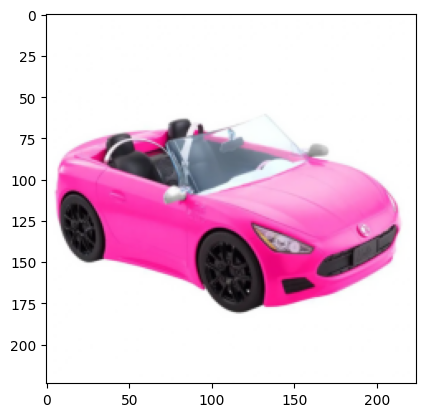

In [19]:
def get_img(img_url):
    img_fname = img_url.split("/")[-1]
    !wget -nc $img_url
    img = imread(img_fname)
    simg = resize(img, output_shape=(224,224,3))
    simg = ((simg-np.min(simg))/(np.max(simg)-np.min(simg))*255).astype(int)
    simg = simg.reshape([1,*simg.shape])
    return simg

simg = get_img(img_url)
print(simg.shape, np.min(simg), np.max(simg))
plt.imshow(simg[0])

make and decode prediction

In [20]:
output = vgg16.predict(simg)
output.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


(1, 1000)

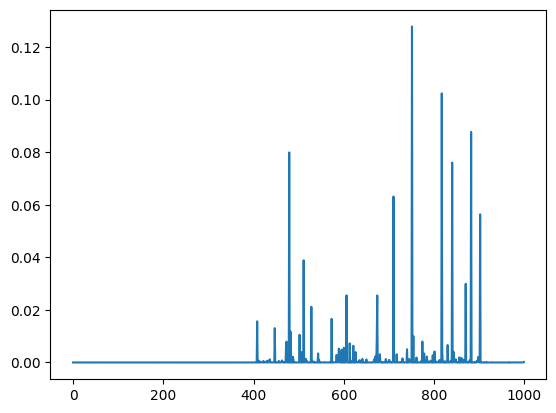

In [21]:
plt.plot(output[0])

In [22]:
np.argsort(output[0])[::-1][:5]

array([751, 817, 882, 479, 840])

In [23]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [24]:
decode_predictions(output)

[[('n04037443', 'racer', 0.12782155),
  ('n04285008', 'sports_car', 0.10238732),
  ('n04517823', 'vacuum', 0.08771041),
  ('n02974003', 'car_wheel', 0.07990214),
  ('n04367480', 'swab', 0.07602853)]]

we can also use it as a feature extractor

In [26]:
inputs = vgg16.layers[1]
layer = vgg16.get_layer('fc1')

layer_output_fn = tf.keras.Model(inputs.input, layer.output)

In [27]:
layer_output_fn(simg)

<tf.Tensor: shape=(1, 4096), dtype=float32, numpy=
array([[ 5.9333596,  0.       ,  0.       , ..., 20.055393 ,  0.       ,
        25.550922 ]], dtype=float32)>

and do other stuff (train other models, compare, etc.)

--2024-08-31 20:25:36--  https://specials-images.forbesimg.com/imageserve/5d61562368cb0a0008c04988/960x0.jpg?fit=scale
Resolving specials-images.forbesimg.com (specials-images.forbesimg.com)... 151.101.1.55, 151.101.65.55, 151.101.129.55, ...
Connecting to specials-images.forbesimg.com (specials-images.forbesimg.com)|151.101.1.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117060 (114K) [image/jpeg]
Saving to: ‘960x0.jpg?fit=scale’

960x0.jpg?fit=scale 100%[===================>] 114.32K  --.-KB/s    in 0.03s   

2024-08-31 20:25:36 (3.39 MB/s) - ‘960x0.jpg?fit=scale’ saved [117060/117060]

--2024-08-31 20:25:36--  https://static01.nyt.com/images/2020/08/13/fashion/12VIRUS-CARS-eli/12VIRUS-CARS-eli-mobileMasterAt3x-v2.jpg
Resolving static01.nyt.com (static01.nyt.com)... 151.101.1.164, 151.101.65.164, 151.101.129.164, ...
Connecting to static01.nyt.com (static01.nyt.com)|151.101.1.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 

(-0.5, 223.5, 223.5, -0.5)

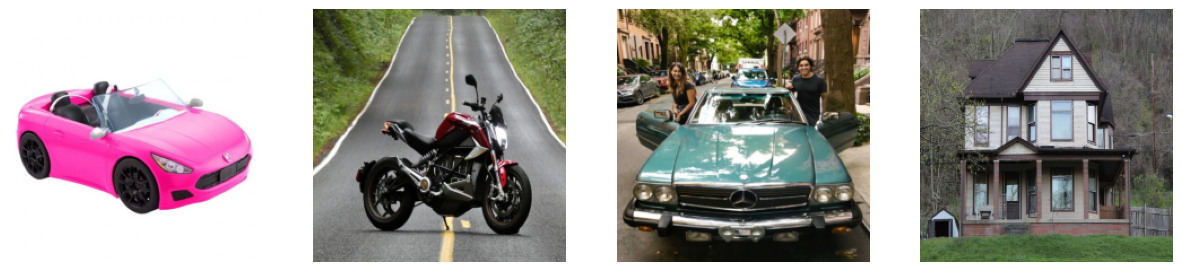

In [28]:
simg2 = get_img('https://specials-images.forbesimg.com/imageserve/5d61562368cb0a0008c04988/960x0.jpg?fit=scale')
simg3 = get_img('https://static01.nyt.com/images/2020/08/13/fashion/12VIRUS-CARS-eli/12VIRUS-CARS-eli-mobileMasterAt3x-v2.jpg')
simg4 = get_img('https://media-cdn.tripadvisor.com/media/photo-s/12/99/82/95/bellaire-house.jpg')
plt.figure(figsize=(15,6))
plt.subplot(141); plt.imshow(simg[0]); plt.axis("off")
plt.subplot(142); plt.imshow(simg2[0]); plt.axis("off")
plt.subplot(143); plt.imshow(simg3[0]); plt.axis("off")
plt.subplot(144); plt.imshow(simg4[0]); plt.axis("off")

In [29]:
feats = layer_output_fn(np.vstack((simg,simg2,simg3,simg4))).numpy()
feats.shape

(4, 4096)

In [30]:
import itertools
r = np.zeros((len(feats), len(feats)))
for i,j in itertools.product(range(len(feats)), range(len(feats))):
    r[i,j] = np.mean(np.abs(feats[i]-feats[j]))
r

array([[0.        , 2.85934472, 3.0932951 , 2.82580185],
       [2.85934472, 0.        , 3.00784516, 2.43986821],
       [3.0932951 , 3.00784516, 0.        , 2.7770021 ],
       [2.82580185, 2.43986821, 2.7770021 , 0.        ]])

and, of course, the imagenet classification

In [31]:
preds = vgg16.predict(np.vstack((simg,simg2,simg3,simg4)))
decode_predictions(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


[[('n04037443', 'racer', 0.12782119),
  ('n04285008', 'sports_car', 0.10238683),
  ('n04517823', 'vacuum', 0.08771067),
  ('n02974003', 'car_wheel', 0.079902455),
  ('n04367480', 'swab', 0.07602853)],
 [('n04482393', 'tricycle', 0.4998707),
  ('n03791053', 'motor_scooter', 0.11783641),
  ('n03785016', 'moped', 0.06644621),
  ('n03534580', 'hoopskirt', 0.04639038),
  ('n02769748', 'backpack', 0.042827234)],
 [('n02930766', 'cab', 0.64287394),
  ('n04252077', 'snowmobile', 0.046685826),
  ('n03459775', 'grille', 0.044866074),
  ('n03445924', 'golfcart', 0.040118206),
  ('n02701002', 'ambulance', 0.03328232)],
 [('n02859443', 'boathouse', 0.40657878),
  ('n02825657', 'bell_cote', 0.17474882),
  ('n03028079', 'church', 0.08881704),
  ('n03930313', 'picket_fence', 0.07153446),
  ('n02793495', 'barn', 0.043169715)]]



## Tensorflow Hub

[https://www.tensorflow.org/hub](https://www.tensorflow.org/hub)